We are gonna go through all concepts and code this thing from scratch.

Let's start

# Introduction

## What does that even mean ?

### *Neural style transfer is an optimization technique used to take two images—a content image and a style reference image (such as an artwork by a famous painter)—and blend them together so the output image looks like the content image, but “painted” in the style of the style reference image.*

### *This is implemented by optimizing the output image to match the content statistics of the content image and the style statistics of the style reference image. These statistics are extracted from the images using a convolutional network.*

You did't got that. It's okay. I ain't going anywhere :)


In other words, we take

**Yellow Labrador + Beautiful Painting = Beautiful Labrador**

Link to andrew Ng videos 

https://youtu.be/R39tWYYKNcI (Part 1)

https://youtu.be/ChoV5h7tw5A (Part 2)

https://youtu.be/xY-DMAJpIP4 (Part 3)

https://youtu.be/b1I5X3UfEYI (Part 4)

Link to original Paper  : https://arxiv.org/pdf/1508.06576.pdf
 

**What Convolutional Neural Network Captures ?**


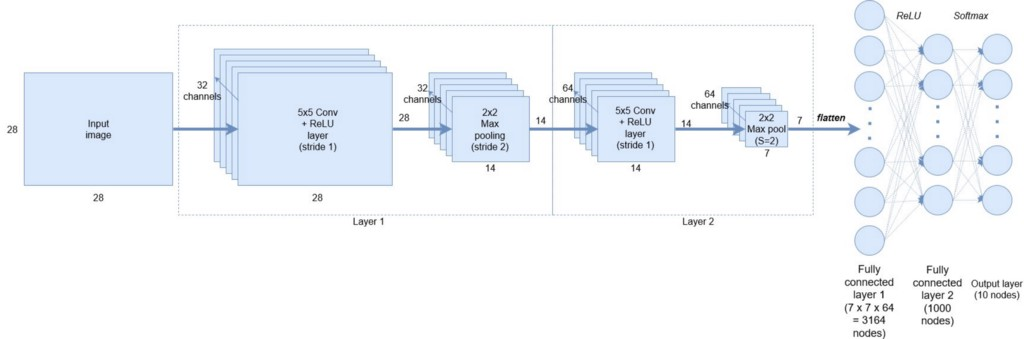

Now, at Layer 1 using 32 filters the network may capture simple patterns, say a straight line or a horizontal line which may not make sense to us but is of immense importance to the network, and slowly as we move down to Layer 2 which has 64 filters, the network starts to capture more and more complex features it might be a face of a dog or wheel of a car. This capturing of different simple and complex features is called feature representation.

Important thing to not here is that CNNs does not know what the image is, but they learn to encode what a particular image represents. This encoding nature of Convolutional Neural Networks can help us in Neural Style Transfer. Let’s dive a bit more deeper.

**How Convolutional Neural Networks are used to capture Content and Style of images?**

VGG19 network is used for Neural Style transfer. VGG-19 is a convolutional neural network that is trained on more than a million images from the ImageNet database. The network is 19 layers deep and trained on millions of images. Because of which it is able to detect high-level features in an image.

Now, this ‘encoding nature’ of CNN’s is the key in Neural Style Transfer. Firstly, we initialize a noisy image, which is going to be our output image(G). We then calculate how similar is this image to the content and style image at a particular layer in the network(VGG network). Since we want that our output image(G) should have the content of the content image(C) and style of style image(S) we calculate the loss of generated image(G) w.r.t to the respective content(C) and style(S) image.

Having the above intuition, let’s define our Content Loss and Style loss to randomly generated noisy image.

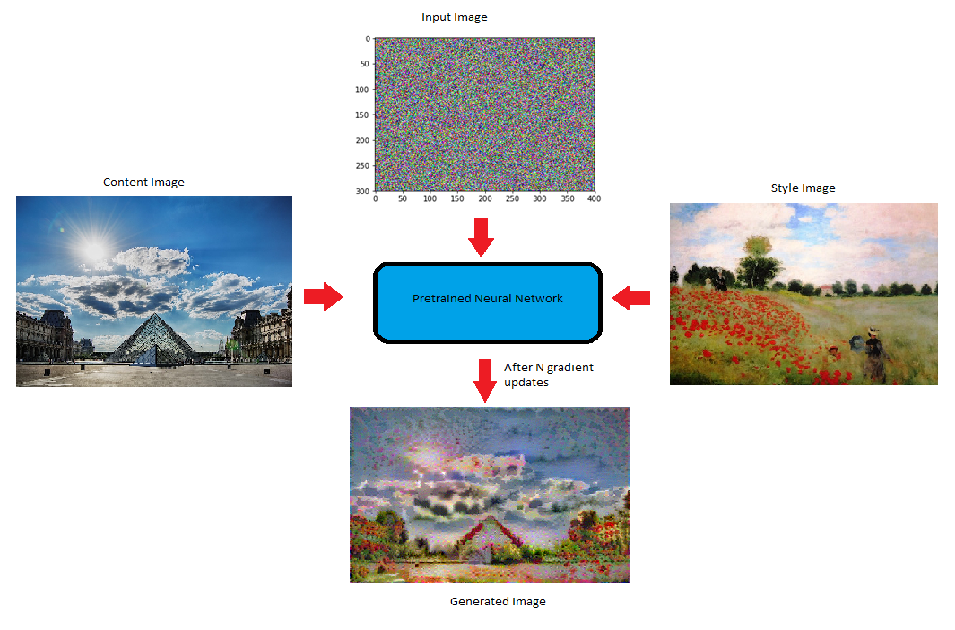

## Content Loss
Calculating content loss means how similar is the randomly generated noisy image(G) to the content image(C).In order to calculate content loss :

Assume that we choose a hidden layer (L) in a pre-trained network(VGG network) to compute the loss.Therefore, let P and F be the original image and the image that is generated.And, F[l] and P[l] be feature representation of the respective images in layer L.Now,the content loss is defined as follows:

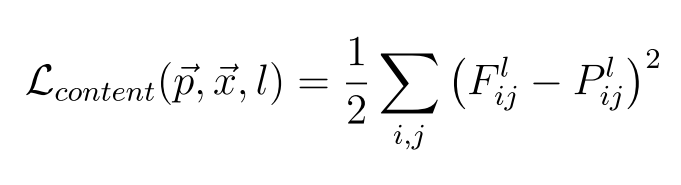

## Style Loss

Before calculating style loss, let’s see what is the meaning of “style of a image” or how we capture style of an image.

How we capture style of an image ?

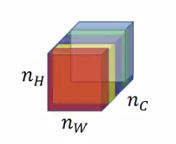

This image shows different channels or feature maps or filters at a particular chosen layer l.Now, in order to capture the style of an image we would calculate how “correlated” these filters are to each other meaning how similar are these feature maps.But what is meant by correlation ?

Let’s understand it with the help of an example:

Let the first two channel in the above image be Red and Yellow.Suppose, the red channel captures some simple feature (say, vertical lines) and if these two channels were correlated then whenever in the image there is a vertical lines that is detected by Red channel then there will be a Yellow-ish effect of the second channel.

Now,let’s look at how to calculate these correlations (mathematically).

In-order to calculate a correlation between different filters or channels we calculate the dot-product between the vectors of the activations of the two filters.The matrix thus obtained is called Gram Matrix.

**But how do we know whether they are correlated or not ?**

If the dot-product across the activation of two filters is large then two channels are said to be correlated and if it is small then the images are un-correlated.Putting it mathematically :

Gram Matrix of Style Image(S):

Here k and k’ represents different filters or channels of the layer L. Let’s call this Gkk’[l][S].

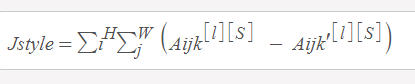
Gram Matrix for style Image

Gram Matrix for Generated Image(G):

Here k and k’ represents different filters or channels of the layer L.Let’s call this Gkk’[l][G].

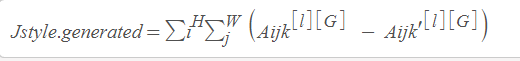
GramMatrix for generated Image

Now,we are in the position to define Style loss:

Cost function between Style and Generated Image is the square of difference between the Gram Matrix of the style Image with the Gram Matrix of generated Image.

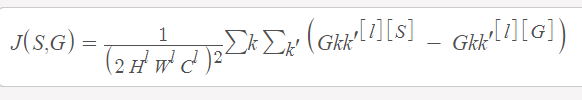

## Total Loss Function :


The total loss function is the sum of the cost of the content and the style image.Mathematically,it can be expressed as :

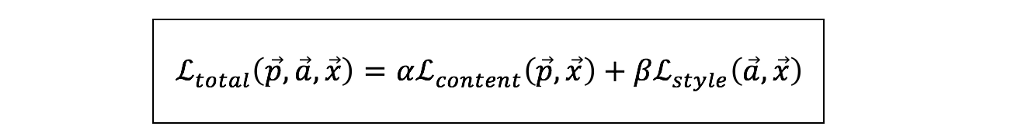

You may have noticed Alpha and beta in the above equation.They are used for weighing Content and Style cost respectively.In general,they define the weightage of each cost in the Generated output image.

Once the loss is calculated,then this loss can be minimized using backpropagation which in turn will optimize our randomly generated image into a meaningful piece of art.

In [1]:
#Lets Code

In [2]:
# Import Library
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.utils import save_image

In [3]:
# Setting model as Vgg19
model = models.vgg19(pretrained = True).features


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth


In [4]:
#print parameter of models
print(model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

[0,5,10,19,28]

In [5]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        # The first number x in convx_y gets added by 1 after it has gone
        # through a maxpool, and the second y if we have several conv layers
        # in between a max pool. These strings (0, 5, 10, ..) then correspond
        # to conv1_1, conv2_1, conv3_1, conv4_1, conv5_1 mentioned in NST paper
        self.chosen_features = ["0", "5", "10", "19", "28"]

        # We don't need to run anything further than conv5_1 (the 28th module in vgg)
        # Since remember, we dont actually care about the output of VGG: the only thing
        # that is modified is the generated image (i.e, the input).
        self.model = models.vgg19(pretrained=True).features[:29]

    def forward(self, x):
        # Store relevant features
        features = []

        # Go through each layer in model, if the layer is in the chosen_features,
        # store it in features. At the end we'll just return all the activations
        # for the specific layers we have in chosen_features
        for layer_num, layer in enumerate(self.model):
            x = layer(x)

            if str(layer_num) in self.chosen_features:
                features.append(x)

        return features

In [6]:
def load_image(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device)


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
imsize = 356

In [8]:
# remember we need to keep the size of all images the same.

In [9]:
# Here we may want to use the Normalization constants used in the original
# VGG network (to get similar values net was originally trained on), but
# I found it didn't matter too much so I didn't end of using it. If you
# use it make sure to normalize back so the images don't look weird.

In [10]:
loader = transforms.Compose(
    [
        transforms.Resize((imsize, imsize)),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [11]:
!ls ../input/


finalimage  originals


In [12]:
original_img = load_image('../input/originals/labrador.jpg')
style_img = load_image('../input/originals/painting.jpg')

In [13]:
#generated = torch.randn(original_img.shape,device = device , requires_grad = True)

generated = original_img.clone().requires_grad_(True)
model = VGG().to(device).eval()


In [14]:
# Hyerparameters
total_steps = 6000
learning_rate = 0.001


In [15]:
alpha = 1
beta = 0.01

In [16]:
optimizer = optim.Adam([generated],lr = learning_rate)

In [17]:
for step in range(total_steps):
    # Obtain the convolution features in specifically chosen layers
    generated_features = model(generated)
    original_img_features = model(original_img)
    style_features = model(style_img)

    # Loss is 0 initially
    style_loss = original_loss = 0

    # iterate through all the features for the chosen layers
    for gen_feature, orig_feature, style_feature in zip(
        generated_features, original_img_features, style_features
    ):

        # batch_size will just be 1
        batch_size, channel, height, width = gen_feature.shape
        original_loss += torch.mean((gen_feature - orig_feature) ** 2)
        # Compute Gram Matrix of generated
        G = gen_feature.view(channel, height * width).mm(
            gen_feature.view(channel, height * width).t()
        )
        # Compute Gram Matrix of Style
        A = style_feature.view(channel, height * width).mm(
            style_feature.view(channel, height * width).t()
        )
        style_loss += torch.mean((G - A) ** 2)

    total_loss = alpha * original_loss + beta * style_loss
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print(total_loss)
        save_image(generated, "generated.png")

tensor(1813213.2500, device='cuda:0', grad_fn=<AddBackward0>)
tensor(113894.0703, device='cuda:0', grad_fn=<AddBackward0>)
tensor(36757.4805, device='cuda:0', grad_fn=<AddBackward0>)
tensor(19586.9492, device='cuda:0', grad_fn=<AddBackward0>)
tensor(13928.2129, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11108.0674, device='cuda:0', grad_fn=<AddBackward0>)
tensor(9342.8320, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8123.9692, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7218.6333, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6512.9785, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5937.9565, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5457.2666, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5044.6860, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4684.4292, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4363.9917, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4073.6453, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3808.9653, device='cuda:0', grad_fn=<Add

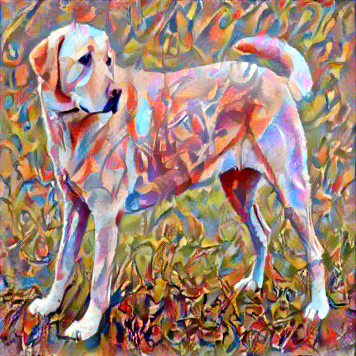

In [18]:
from IPython.display import display
from PIL import Image


path="../input/finalimage/generated.png"
display(Image.open(path))